In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [5]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'})


In [6]:
print("=== Contoh Data (10 baris pertama) ===")
print(df.head(10))


=== Contoh Data (10 baris pertama) ===
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

       species  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iri

In [7]:
X = df[iris.feature_names]  # fitur
y = df['species']           # target


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Ukuran training:", X_train.shape[0], "baris")
print("Ukuran testing:", X_test.shape[0], "baris")


Ukuran training: 120 baris
Ukuran testing: 30 baris


In [9]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
print("Model terlatih.")


Model terlatih.


In [10]:
y_pred = model.predict(X_test)

print("=== Evaluasi Model ===")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


=== Evaluasi Model ===
Akurasi: 1.0

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


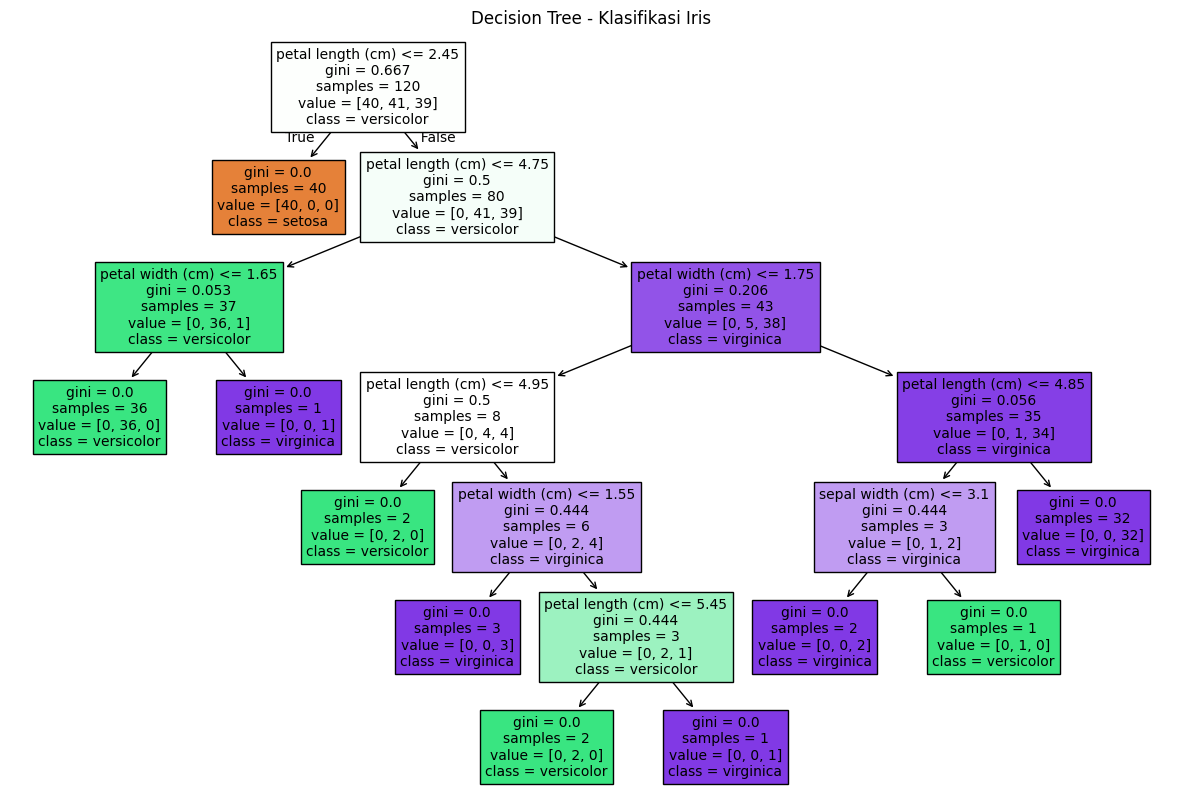

In [12]:
plt.figure(figsize=(15,10))
plot_tree(
    model,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    fontsize=10
)
plt.title("Decision Tree - Klasifikasi Iris")
plt.show()


Disimpan: decision_tree_iris.png


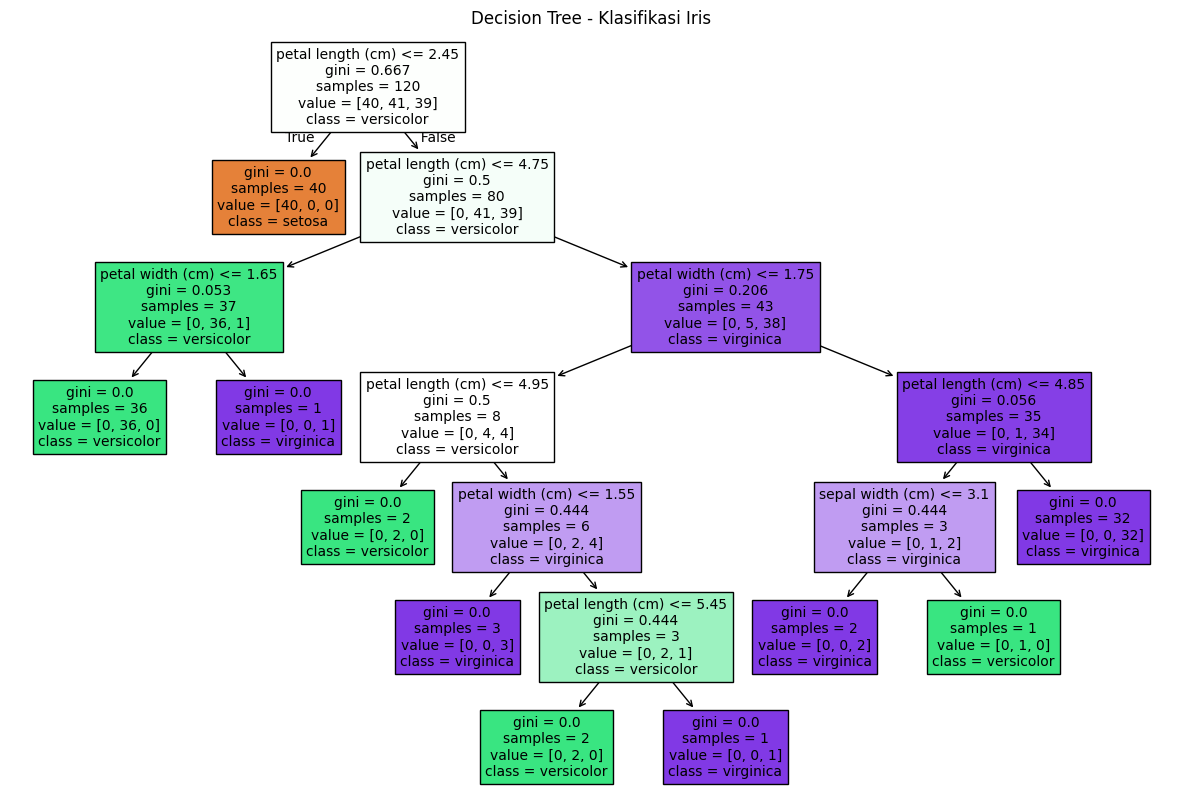

In [13]:
plt.figure(figsize=(15,10))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, fontsize=10)
plt.title("Decision Tree - Klasifikasi Iris")
plt.savefig("decision_tree_iris.png", bbox_inches='tight')
print("Disimpan: decision_tree_iris.png")
